---
# Caso Mall Customers

Se cuenta con un dataset de clientes de un importante mall de la ciudad. Los datos son los siguientes:

- CustomerID: correlativo identificador del cliente
- Genre: sexo del cliente
- Age: edad del cliente
- Annual Income: sueldo anual en miles de dolares
- Spending Score: score de gasto calculado para el cliente, mientras mayor más gasta

Se busca realizar una caracterización de los clientes, para lo cual se le solicita que realice una **Clusterización Jerárquica** considerando solamente las variables **Annual Income** y **Spending Score**. Se pide lo siguiente:

- Realice una clusterización K-Means
- Aplique método del codo para determinar la cantidad de clusters
- Aplique método de la silueta
- Agregue la clusterización al dataset

---

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Carga de datos

In [15]:
dataset = pd.read_csv('Mall_Customers.csv')

In [16]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Formulación del Modelo

In [17]:
# Usaremos solo las columnas de interés: Annual Income (k$) y Spending Score (1-100)
X = dataset[["Annual Income (k$)", "Spending Score (1-100)"]].values

### Escalamiento

In [18]:
from sklearn.preprocessing import StandardScaler

# Escalamiento de las variables (recomendado para clustering por distancia)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

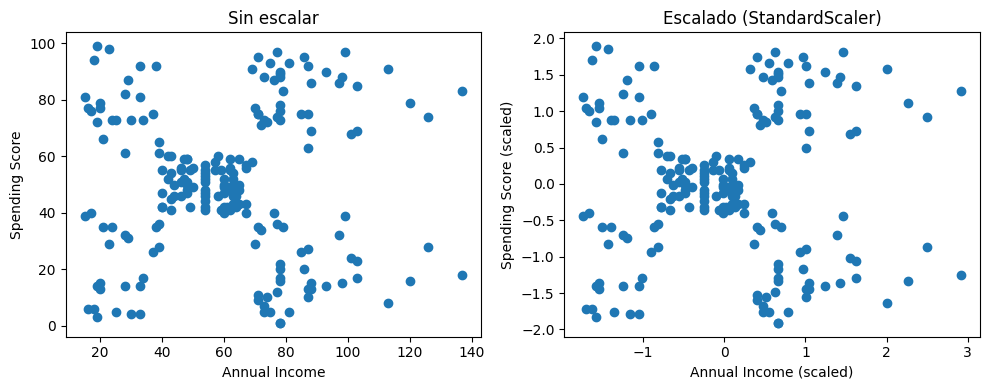

In [19]:
# Opcional: comparar distribución antes y después del escalamiento
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].scatter(X[:, 0], X[:, 1])
axes[0].set_title('Sin escalar')
axes[0].set_xlabel('Annual Income')
axes[0].set_ylabel('Spending Score')

axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1])
axes[1].set_title('Escalado (StandardScaler)')
axes[1].set_xlabel('Annual Income (scaled)')
axes[1].set_ylabel('Spending Score (scaled)')

plt.tight_layout()
plt.show()

In [20]:
# Para el resto del ejercicio utilizaremos X_scaled como entrada al algoritmo
X_for_clust = X_scaled

### Clusterización K-Means

c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

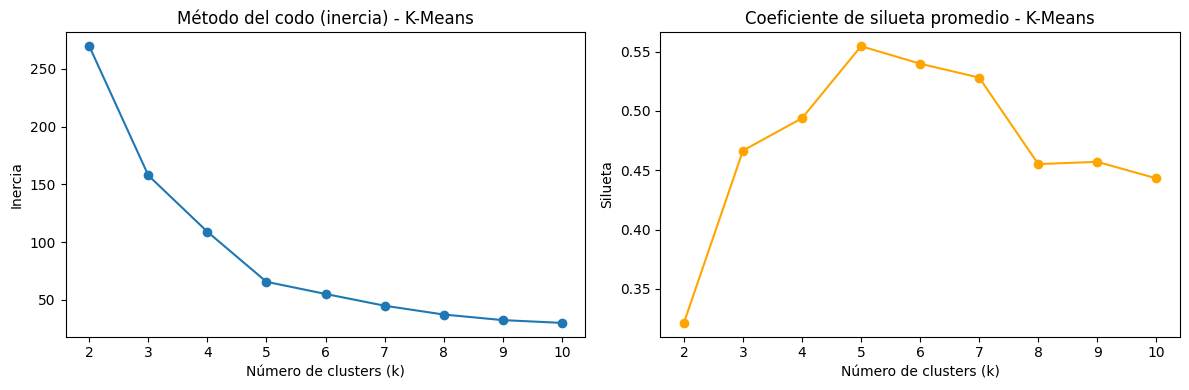

k = 2, silueta promedio = 0.321
k = 3, silueta promedio = 0.467
k = 4, silueta promedio = 0.494
k = 5, silueta promedio = 0.555
k = 6, silueta promedio = 0.540
k = 7, silueta promedio = 0.528
k = 8, silueta promedio = 0.455
k = 9, silueta promedio = 0.457
k = 10, silueta promedio = 0.443


In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Definimos el rango de k a evaluar
range_n_clusters = range(2, 11)
inertias = []
silhouettes = []

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_for_clust)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_for_clust, kmeans.labels_))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(list(range_n_clusters), inertias, marker='o')
plt.title('Método del codo (inercia) - K-Means')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')

plt.subplot(1, 2, 2)
plt.plot(list(range_n_clusters), silhouettes, marker='o', color='orange')
plt.title('Coeficiente de silueta promedio - K-Means')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silueta')

plt.tight_layout()
plt.show()

for k, s in zip(range_n_clusters, silhouettes):
    print(f'k = {k}, silueta promedio = {s:.3f}')

In [22]:
# Seleccionamos el mejor k según el coeficiente de silueta
print("Valores de silueta:", silhouettes)
best_k = list(range_n_clusters)[np.argmax(silhouettes)]
print(f"Mejor k según silueta: {best_k}")

# También se podría elegir k visualmente a partir del codo.
# Aquí usaremos best_k como número final de clusters.
n_clusters_final = best_k

kmeans_final = KMeans(n_clusters=n_clusters_final, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_for_clust)

np.unique(cluster_labels, return_counts=True)

Valores de silueta: [np.float64(0.3212707813918878), np.float64(0.46658474419000145), np.float64(0.4939069237513199), np.float64(0.5546571631111091), np.float64(0.5398800926790663), np.float64(0.5281492781108291), np.float64(0.4552147906587443), np.float64(0.4570853966942764), np.float64(0.4431713026508046)]
Mejor k según silueta: 5


c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(array([0, 1, 2, 3, 4], dtype=int32), array([81, 39, 22, 35, 23]))

In [23]:
# Guardamos los labels de K-Means para usarlos en gráficos y análisis posteriores
labels = cluster_labels
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([81, 39, 22, 35, 23]))

In [24]:
# Guardamos los labels para usarlos en gráficos y análisis posteriores
labels = cluster_labels

In [25]:
# Resumen rápido de cuántos clientes hay en cada cluster
cluster_ids, counts = np.unique(labels, return_counts=True)
for cid, cnt in zip(cluster_ids, counts):
    print(f"Cluster {cid}: {cnt} clientes")

Cluster 0: 81 clientes
Cluster 1: 39 clientes
Cluster 2: 22 clientes
Cluster 3: 35 clientes
Cluster 4: 23 clientes


### Grafique los resultados

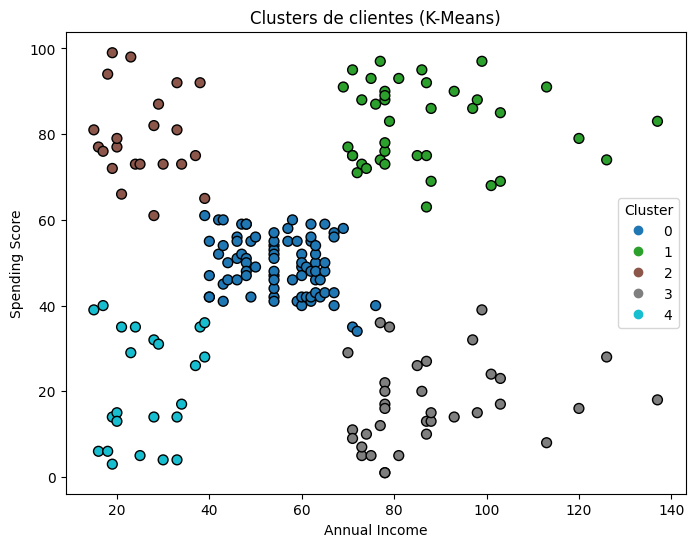

In [26]:
# Gráfico de dispersión de Annual Income vs Spending Score coloreado por cluster (K-Means)
plt.figure(figsize=(8, 6))

scatter = plt.scatter(
    X[:, 0], X[:, 1],
    c=labels,
    cmap='tab10',
    s=50,
    edgecolor='k'
)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clusters de clientes (K-Means)')
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.show()

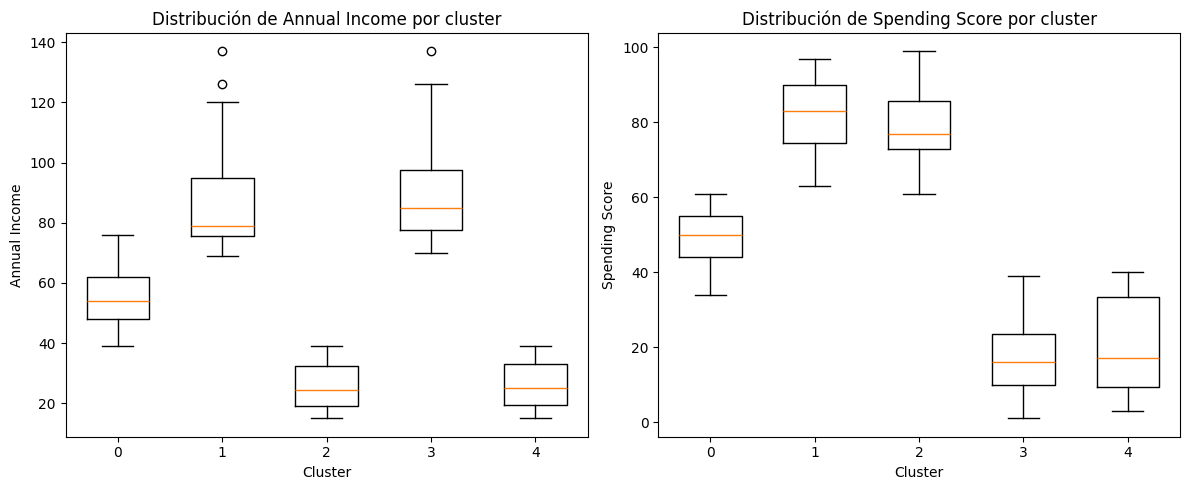

In [27]:
# Boxplots para entender el perfil de cada cluster en las dos variables
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for cid in np.unique(labels):
    axes[0].boxplot(
        [X[labels == cid, 0]],
        positions=[cid],
        widths=0.6
    )
axes[0].set_xticks(cluster_ids)
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Annual Income')
axes[0].set_title('Distribución de Annual Income por cluster')

for cid in np.unique(labels):
    axes[1].boxplot(
        [X[labels == cid, 1]],
        positions=[cid],
        widths=0.6
    )
axes[1].set_xticks(cluster_ids)
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Spending Score')
axes[1].set_title('Distribución de Spending Score por cluster')

plt.tight_layout()
plt.show()

### Modifique dataset original con resultados de la clusterización

In [28]:
# Agregar la etiqueta de cluster al dataset original
# (sumamos 1 para que los clusters vayan de 1..k en lugar de 0..k-1)
dataset['Cluster'] = labels + 1

dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,3
2,3,Female,20,16,6,5
3,4,Female,23,16,77,3
4,5,Female,31,17,40,5


In [29]:
# Resumen de cada cluster: cantidad de clientes y promedios de las principales variables
cluster_summary = dataset.groupby('Cluster').agg({
    'CustomerID': 'count',
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
}).rename(columns={'CustomerID': 'NumClientes'})

cluster_summary

,NumClientes,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
1,81,42.716049,55.296296,49.518519
2,39,32.692308,86.538462,82.128205
3,22,25.272727,25.727273,79.363636
4,35,41.114286,88.200000,17.114286
5,23,45.217391,26.304348,20.913043


## 5. Comparación y análisis

- Compare **las características de los clusters** obtenidos:
    - ¿Qué diferencias observa entre los grupos en cuanto a **ingreso anual** y **spending score**?
    - ¿Algún cluster representa clientes de alto valor o clientes con bajo gasto?
- Analice:
    - ¿Cuántos clusters se aprecian claramente según el dendrograma y las métricas?
    - ¿Qué perfil de cliente predomina en cada cluster?
    - ¿Cómo podría el mall utilizar esta segmentación para estrategias de marketing o fidelización?

A partir de estas observaciones redacte sus **conclusiones** sobre la utilidad de la clusterización jerárquica para la segmentación de clientes en el contexto del mall.

---

> **Nota:** Recuerde que todas las explicaciones y análisis deben estar redactados en español, siguiendo el estándar educativo del bootcamp. Utilice comentarios bilingües en las celdas de código y asegúrese de que los resultados sean claros para comparar los diferentes grupos de clientes.